In [63]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np

In [64]:
# Reading data
data = pd.read_csv('/Users/hoosiersaikap251/dataviz/docs/Final_Data.csv')
data.head(5)

,ID,Upvotes,Submission Date,Status,est_dev_time_days,complexity_score,num_teams_required,resource_cost_usd,infra_dependencies_count,tech_risk_score,...,aligns_with_okrs,supports_key_initiative,compliance_or_regulatory_benefit,innovation_score,executive_priority_flag,strategic_timeline_alignment,mission_critical_flag,long_term_value_score,Title,Description
0,f7121191-cbbf-4f74-8256-024ea3987b2c,343,2024-05-17,On Hold,34,1,3,156494,4,1,...,True,Automation,True,5,True,False,False,2,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...
1,a39a9628-4938-4ccf-9f15-122aed064631,199,2025-01-16,On Hold,80,2,3,175066,2,3,...,False,NaN,True,4,True,False,True,5,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...
2,e2eb83ea-cf0f-48d0-b688-70f646ff514a,262,2024-07-08,Completed,23,3,3,69152,2,5,...,False,Sustainability,False,5,False,True,True,1,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...
3,356a87f2-1297-4740-8dd2-9c2fc687630d,129,2024-05-28,On Hold,13,4,1,98541,4,2,...,False,Sustainability,False,2,True,True,False,5,AI-Powered Dog System,AI-Powered Dog System is focused on reducing m...
4,d20030cb-2356-4234-8358-2c3e87e902dc,365,2024-05-13,On Hold,27,2,3,78405,5,2,...,False,NaN,False,5,False,True,True,3,Predictive Since Agent,Predictive Since Agent is focused on improving...


Taking Features Related to ROI Metric

| Feature Name                    | Description                                                                                 |
|--------------------------------|---------------------------------------------------------------------------------------------|
| business_impact_score          | Estimated business value or impact score (1-10)                                             |
| user_demand_score              | User demand or interest score (1-10 or based on upvotes/surveys)                            |
| customer_satisfaction_impact   | Impact on customer satisfaction or NPS (e.g., score 1-5)                                    |
| time_saved_per_user_minutes    | Estimated time saved per user per week in minutes                                          |
| num_users_impacted             | Number of users expected to be impacted                                                    |
| market_differentiation_score   | Score indicating how much this sets product apart in market (1-5)                          |
| revenue_potential_usd          | Projected revenue increase in USD from this feature                                        |
| cost_savings_usd               | Projected cost savings in USD from this feature                                            |
| scalability_potential_score    | Score indicating how scalable or reusable the idea is (1-5)                                |
| feature_adoption_likelihood    | Likelihood of feature adoption (percentage or 1-5 scale)                                   |


In [65]:

df_ROI = data[['Title','Description','business_impact_score', 'user_demand_score', 'customer_satisfaction_impact', 
               'time_saved_per_user_minutes', 'num_users_impacted', 'market_differentiation_score', 
               'revenue_potential_usd', 'cost_savings_usd', 'scalability_potential_score', 
               'feature_adoption_likelihood']].copy()

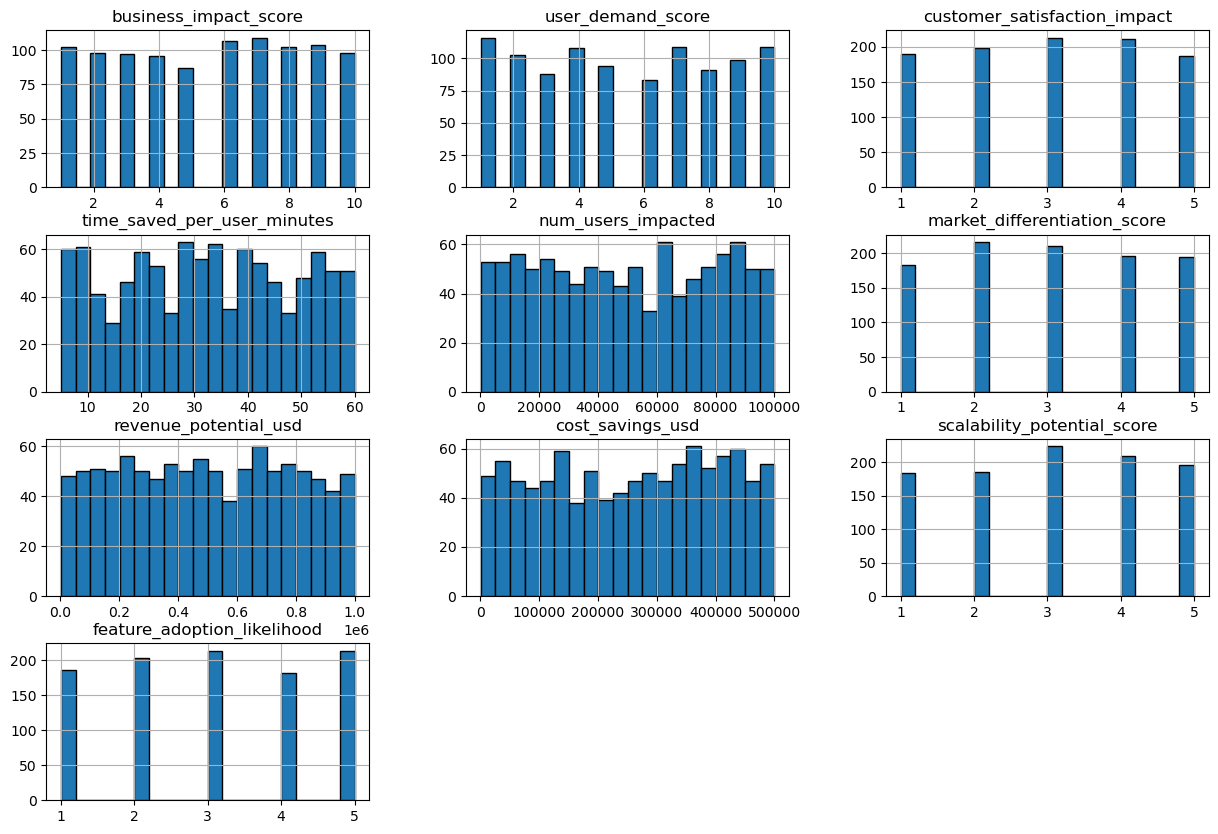

In [66]:
df_ROI.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

Normalizing the Data based on Min-Max Scaling 

In [67]:
numerical_columns = df_ROI.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_ROI_normalized = df_ROI.copy()
df_ROI_normalized[numerical_columns] = scaler.fit_transform(df_ROI[numerical_columns])
df_ROI_normalized.head(5)

,Title,Description,business_impact_score,user_demand_score,customer_satisfaction_impact,time_saved_per_user_minutes,num_users_impacted,market_differentiation_score,revenue_potential_usd,cost_savings_usd,scalability_potential_score,feature_adoption_likelihood
0,Zero-Touch Purpose System,Zero-Touch Purpose System is focused on enhanc...,0.888889,0.333333,0.00,0.200000,0.124573,0.50,0.186031,0.185992,0.00,0.50
1,Cloud-Based Ago Analyzer,Cloud-Based Ago Analyzer is focused on optimiz...,0.333333,0.444444,0.00,0.145455,0.780422,0.25,0.455180,0.121072,0.50,0.50
2,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...,0.555556,0.777778,0.25,0.781818,0.886522,0.50,0.844375,0.884599,1.00,0.75
3,AI-Powered Dog System,AI-Powered Dog System is focused on reducing m...,0.222222,0.888889,0.00,0.618182,0.016157,0.25,0.967639,0.585044,0.75,0.75
4,Predictive Since Agent,Predictive Since Agent is focused on improving...,0.000000,0.444444,0.75,0.272727,0.614375,0.75,0.109492,0.664822,0.75,0.00


In [68]:
# Keeping the Target Label Randomly (Although it will depend upon the labeled data from the upstream)
df_ROI_normalized['target'] = np.random.rand(len(df_ROI_normalized))

In [69]:
# Train, Val and Test Split For Training Random Forest Model
from sklearn.model_selection import train_test_split

df_train,df_temp = train_test_split(df_ROI_normalized, train_size=800, random_state=42)
df_val, df_test = train_test_split(df_ROI_normalized, test_size=100, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Training the Model
X = df_train[numerical_columns]
y = df_train['target']


rf_regressor = RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X, y)

# Val Set
X_val = df_val[numerical_columns]
y_val = df_val['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

MSE: 0.020707558850158982


Feature importance indicates how much each feature contributes to the predictive power of the model.
Higher importance values mean the feature plays a bigger role in the model’s decisions.
This helps with model interpretability and can guide feature selection or engineering.

In [71]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_
importances_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                        Feature  Importance
7              cost_savings_usd    0.166624
4            num_users_impacted    0.162483
6         revenue_potential_usd    0.159560
3   time_saved_per_user_minutes    0.132824
1             user_demand_score    0.082679
0         business_impact_score    0.082250
9   feature_adoption_likelihood    0.053662
2  customer_satisfaction_impact    0.053598
8   scalability_potential_score    0.053465
5  market_differentiation_score    0.052855


In [72]:
importances_df.to_csv('feature_importances_roi.csv', index=False)

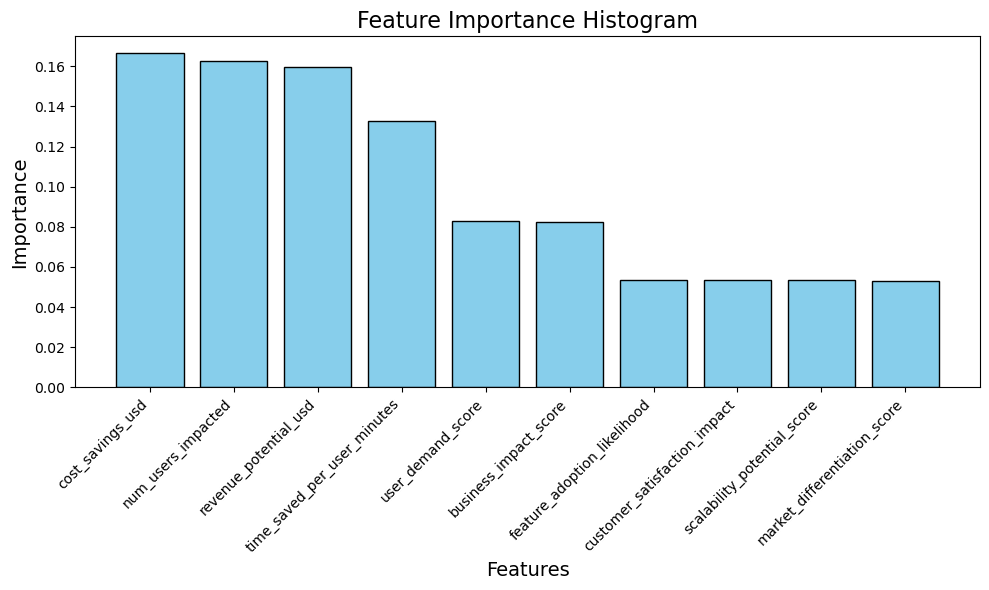

In [81]:
import matplotlib.pyplot as plt

# Plotting the feature importance histogram
plt.figure(figsize=(10, 6))
plt.bar(importances_df['Feature'], importances_df['Importance'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance Histogram', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()

In [74]:
feature_weights = pd.Series(feature_importances, index=X.columns)

In [75]:
df_train['roi_target'] = df_train[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [76]:
df_train_sorted = df_train.sort_values(by='roi_target', ascending=False)
df_train_sorted.head(3)

,Title,Description,business_impact_score,user_demand_score,customer_satisfaction_impact,time_saved_per_user_minutes,num_users_impacted,market_differentiation_score,revenue_potential_usd,cost_savings_usd,scalability_potential_score,feature_adoption_likelihood,target,roi_target
676,Zero-Touch Month Platform,Zero-Touch Month Platform is focused on improv...,0.333333,0.777778,1.00,0.909091,0.995019,0.25,0.967085,0.870671,1.0,1.00,0.161851,0.847467
132,Cloud-Based Receive Dashboard,Cloud-Based Receive Dashboard is focused on en...,1.000000,0.777778,1.00,0.400000,0.708338,0.25,0.841341,0.977705,1.0,1.00,0.966781,0.785871
2,Intelligent Face Bot,Intelligent Face Bot is focused on streamlinin...,0.555556,0.777778,0.25,0.781818,0.886522,0.50,0.844375,0.884599,1.0,0.75,0.374054,0.773552


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Test Set
X_val = df_test[numerical_columns]
y_test = df_test['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.07815019474336553


In [78]:
# Assigning Weights to the Features for whole Dataset
df_all_ROI=df_ROI_normalized.copy()
df_all_ROI['ROI_Score'] = df_all_ROI[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [79]:
df_all_ROI.head(1)
df_all_ROI.to_csv('df_all_ROI.csv', index=False)